## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [471]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [472]:
df_flights = pd.read_csv(r'..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [473]:
df_flights['month'] = pd.DatetimeIndex(df_flights['fl_date']).month
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,1
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN,1
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1


In [474]:
df_flights.groupby('month', as_index=False).agg(median_arr_delay = ('arr_delay','median')).sort_values(by='median_arr_delay', ascending=False)

,month,median_arr_delay
4,5,-5.0
5,6,-5.0
6,7,-5.0
7,8,-5.0
11,12,-5.0
1,2,-6.0
3,4,-6.0
10,11,-6.0
2,3,-7.0
9,10,-7.0


In [475]:
df_flights.groupby('month', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='mean_arr_delay', ascending=False)

,month,mean_arr_delay
5,6,10.110002
7,8,10.088413
6,7,8.887685
4,5,6.801185
1,2,6.575149
11,12,6.068550
3,4,5.377257
2,3,2.890610
9,10,2.466155
0,1,2.282651


<AxesSubplot: >

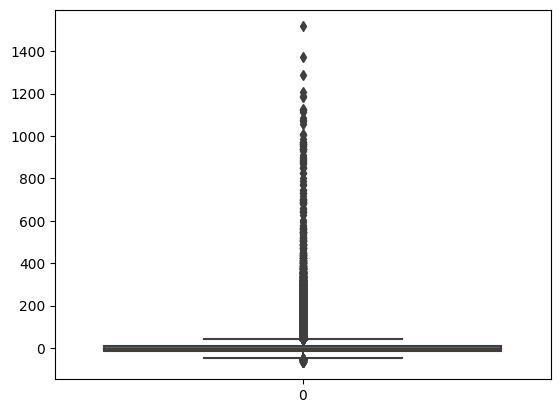

In [476]:
sns.boxplot(data=df_flights['arr_delay'])

<AxesSubplot: xlabel='arr_delay', ylabel='Count'>

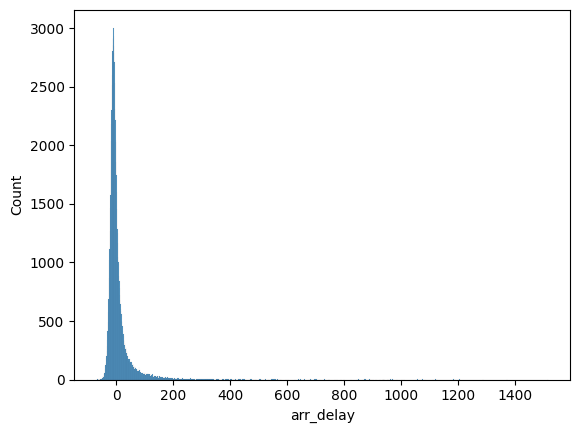

In [477]:
sns.histplot(data=df_flights['arr_delay'])

In [478]:
df_flights['arr_delay'].describe()

count    99110.000000
mean         5.384240
std         48.489584
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1516.000000
Name: arr_delay, dtype: float64

In [479]:
df_flights.groupby(['arr_delay','mkt_unique_carrier']).max().sort_values(by='arr_delay', ascending=False).head(20)

,,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
arr_delay,mkt_unique_carrier,,,,,,,,,,,,,,,,,,,,,
1516.0,AA,2019-08-07,AA_CODESHARE,AA,3907,MQ,N808AE,3907,11980,GRI,"Grand Island, NE",...,1503.0,0.0,13.0,0.0,0.0,NaN,NaN,NaN,NaN,8
1373.0,AA,2019-10-20,AA,AA,482,AA,N840AW,482,11292,DEN,"Denver, CO",...,769.0,0.0,0.0,0.0,604.0,NaN,NaN,NaN,NaN,10
1288.0,UA,2019-03-11,UA_CODESHARE,UA,4206,EV,N17984,4206,12339,IND,"Indianapolis, IN",...,5.0,0.0,1283.0,0.0,0.0,NaN,NaN,NaN,NaN,3
1205.0,AA,2019-06-18,AA,AA,162,AA,N134AN,162,12173,HNL,"Honolulu, HI",...,0.0,0.0,0.0,1078.0,127.0,NaN,NaN,NaN,NaN,6
1189.0,UA,2018-10-06,UA_CODESHARE,UA,5500,OO,N957SW,5500,14696,SBN,"South Bend, IN",...,1124.0,0.0,34.0,0.0,31.0,NaN,NaN,NaN,NaN,10
1185.0,UA,2019-08-19,UA_CODESHARE,UA,6171,YV,N502MJ,6171,14321,PWM,"Portland, ME",...,0.0,0.0,1185.0,0.0,0.0,NaN,NaN,NaN,NaN,8
1127.0,UA,2019-08-19,UA_CODESHARE,UA,5405,OO,N933EV,5405,11637,FAR,"Fargo, ND",...,1127.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,8
1122.0,DL,2019-07-11,DL_CODESHARE,DL,3285,9E,N834AY,3285,14321,PWM,"Portland, ME",...,112.0,1000.0,10.0,0.0,0.0,1319.0,92.0,92.0,NaN,7
1121.0,NK,2018-05-15,NK,NK,313,NK,N516NK,313,11433,DTW,"Detroit, MI",...,0.0,0.0,1121.0,0.0,0.0,NaN,NaN,NaN,NaN,5


Average / mean monthly flight delay is higher in the summer months in the US - May to August. This may be because people tend to go on vacation more during the summer, especially when children are not in school and families can take trips.

Overall, the distribution of flight delays is highly positively skewed, with some extreme outliers where planes were very delayed.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [480]:
filter = df_flights[['taxi_out','dep_time','flights']]
filter.head()

,taxi_out,dep_time,flights
0,9.0,2005.0,1
1,11.0,2200.0,1
2,11.0,646.0,1
3,10.0,737.0,1
4,13.0,1821.0,1


In [481]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [482]:
filter = clean_dataset(filter)

C:\Users\User\AppData\Local\Temp\ipykernel_25028\1442344577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_25028\1442344577.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [483]:
filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99338 entries, 0 to 100997
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   taxi_out  99338 non-null  float64
 1   dep_time  99338 non-null  float64
 2   flights   99338 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


In [484]:
taxi_by_dep_time = filter.groupby('dep_time', as_index=False).mean('taxi_out').sort_values('dep_time')

<AxesSubplot: xlabel='dep_time', ylabel='taxi_out'>

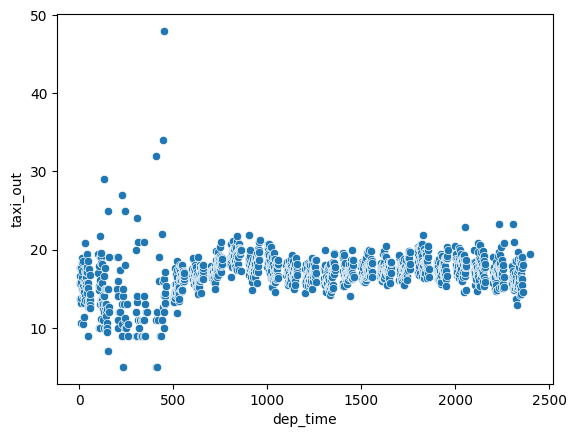

In [485]:
sns.scatterplot(taxi_by_dep_time, x='dep_time', y='taxi_out')

In [486]:
df_flights['flights'].unique()

array([1], dtype=int64)

In [487]:
filter['dep_time_grouped'] = pd.cut(df_flights['dep_time'], 24, labels=range(1,25))
filter.head()

,taxi_out,dep_time,flights,dep_time_grouped
0,9.0,2005.0,1.0,21
1,11.0,2200.0,1.0,22
2,11.0,646.0,1.0,7
3,10.0,737.0,1.0,8
4,13.0,1821.0,1.0,19


In [488]:
filter['dep_time_grouped'].value_counts()

13    6221
7     6183
18    6167
9     6070
12    6055
8     6017
16    5962
11    5941
10    5886
15    5792
17    5660
19    5638
14    5490
20    5412
21    4645
6     4054
22    3441
23    2734
24    1017
1      455
5      262
2      161
3       43
4       32
Name: dep_time_grouped, dtype: int64

In [489]:
filter.groupby('dep_time_grouped').mean('taxi_out')

,taxi_out,dep_time,flights
dep_time_grouped,,,
1,15.487912,31.043956,1.0
2,14.807453,125.136646,1.0
3,13.046512,230.906977,1.0
4,12.625000,325.968750,1.0
5,14.450382,457.854962,1.0
6,16.293784,545.859645,1.0
7,16.772117,633.725538,1.0
8,17.734585,732.099551,1.0
9,19.197529,831.560461,1.0


In [490]:
taxi_by_traffic_volume = filter.groupby('dep_time_grouped', as_index=False).agg(
                        {'taxi_out':'mean', 
                         'flights':'sum'
                         })
taxi_by_traffic_volume

,dep_time_grouped,taxi_out,flights
0,1,15.487912,455.0
1,2,14.807453,161.0
2,3,13.046512,43.0
3,4,12.625000,32.0
4,5,14.450382,262.0
5,6,16.293784,4054.0
6,7,16.772117,6183.0
7,8,17.734585,6017.0
8,9,19.197529,6070.0
9,10,18.159361,5886.0


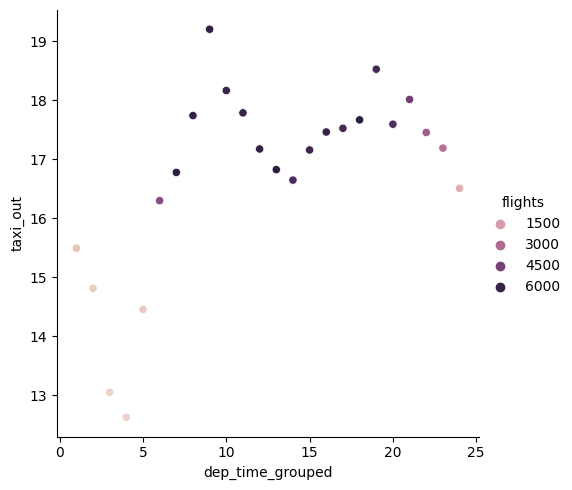

In [491]:
g = sns.relplot(data=taxi_by_traffic_volume, x='dep_time_grouped', y='taxi_out', hue='flights')

Early morning flights tend to have a lower mean taxi time, which corresponds to a much lower volume of flights

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

In [492]:
filter = df_flights[['origin_city_name','dest_city_name','flights']]
filter.head()

,origin_city_name,dest_city_name,flights
0,"Las Vegas, NV","Oklahoma City, OK",1
1,"Las Vegas, NV","Omaha, NE",1
2,"Las Vegas, NV","Omaha, NE",1
3,"Las Vegas, NV","Ontario, CA",1
4,"Las Vegas, NV","Ontario, CA",1


In [493]:
new_origin = filter['origin_city_name'].str.split(",", n = 1, expand = True)
new_origin.head()

,0,1
0,Las Vegas,NV
1,Las Vegas,NV
2,Las Vegas,NV
3,Las Vegas,NV
4,Las Vegas,NV


In [494]:
new_dest = filter['dest_city_name'].str.split(",", n = 1, expand = True)
new_dest.head()

,0,1
0,Oklahoma City,OK
1,Omaha,NE
2,Omaha,NE
3,Ontario,CA
4,Ontario,CA


In [495]:
filter['origin_state'] = new_origin[1]
filter['dest_state'] = new_dest[1]
filter.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25028\4092038663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['origin_state'] = new_origin[1]
C:\Users\User\AppData\Local\Temp\ipykernel_25028\4092038663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['dest_state'] = new_dest[1]


,origin_city_name,dest_city_name,flights,origin_state,dest_state
0,"Las Vegas, NV","Oklahoma City, OK",1,NV,OK
1,"Las Vegas, NV","Omaha, NE",1,NV,NE
2,"Las Vegas, NV","Omaha, NE",1,NV,NE
3,"Las Vegas, NV","Ontario, CA",1,NV,CA
4,"Las Vegas, NV","Ontario, CA",1,NV,CA


In [496]:
flights_by_state = filter.groupby(['origin_state','dest_state'], as_index=False).sum('flights').sort_values(by='flights',ascending=False)
flights_by_state.head()

,origin_state,dest_state,flights
81,CA,CA,3325
1150,TX,TX,2525
113,CA,TX,997
1114,TX,CA,901
250,FL,NY,895


In [497]:
flights_by_state['percent_total_flights'] = 100*(flights_by_state['flights']/flights_by_state['flights'].sum())
flights_by_state.head()

,origin_state,dest_state,flights,percent_total_flights
81,CA,CA,3325,3.292144
1150,TX,TX,2525,2.500050
113,CA,TX,997,0.987148
1114,TX,CA,901,0.892097
250,FL,NY,895,0.886156


In [498]:
flights_by_state['cum_percent'] = 100*(flights_by_state.flights.cumsum() / flights_by_state.flights.sum())
flights_by_state.head()

,origin_state,dest_state,flights,percent_total_flights,cum_percent
81,CA,CA,3325,3.292144,3.292144
1150,TX,TX,2525,2.500050,5.792194
113,CA,TX,997,0.987148,6.779342
1114,TX,CA,901,0.892097,7.671439
250,FL,NY,895,0.886156,8.557595


In [499]:
highest_traffic = flights_by_state.loc[flights_by_state['cum_percent'] <= 50,:]
highest_traffic.head()

,origin_state,dest_state,flights,percent_total_flights,cum_percent
81,CA,CA,3325,3.292144,3.292144
1150,TX,TX,2525,2.500050,5.792194
113,CA,TX,997,0.987148,6.779342
1114,TX,CA,901,0.892097,7.671439
250,FL,NY,895,0.886156,8.557595


In [500]:
states = set(highest_traffic['origin_state']) | set(highest_traffic['dest_state'])
len(states)

29

In [501]:
highest_traffic_plot = highest_traffic[['origin_state','flights']]
highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())
highest_traffic_plot = highest_traffic_plot.groupby('origin_state',as_index=False).sum('flights').sort_values(by='flights', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_25028\3693035196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())


Text(0.5, 1.0, 'States Accounting for 50% of Air Travel')

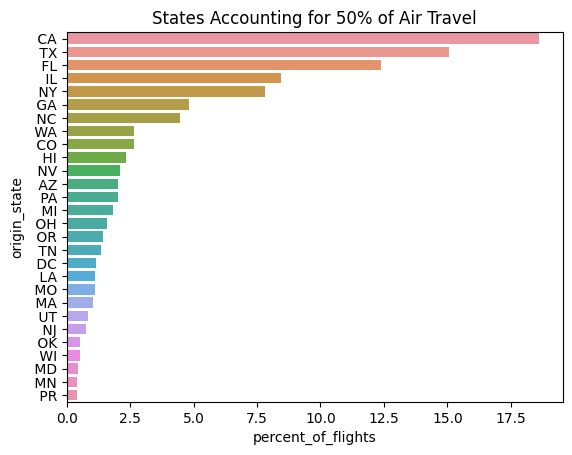

In [502]:
g = sns.barplot(data=highest_traffic_plot, x='percent_of_flights',  y='origin_state')
g.set_title('States Accounting for 50% of Air Travel')

50% of air traffic occurs across 29 states

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [503]:
# short, medium, long haul definitions from: https://en.wikipedia.org/wiki/Flight_length

In [504]:
df_flights['distance'].describe()

count    100998.000000
mean        774.058486
std         585.277397
min          31.000000
25%         345.000000
50%         612.000000
75%        1012.000000
max        4983.000000
Name: distance, dtype: float64

In [505]:
df_flights['haul'] = pd.cut(df_flights['distance'], bins = [0,800,2200,5000],labels=['short','medium','long'])

In [506]:
filter = df_flights[['haul','flights','dep_time']]
filter.groupby('haul',as_index=False).count()

,haul,flights,dep_time
0,short,63126,61937
1,medium,33475,33109
2,long,4397,4379


In [507]:
df_flights['dep_time'].describe()

count    99425.000000
mean      1334.333437
std        502.777726
min          1.000000
25%        919.000000
50%       1327.000000
75%       1743.000000
max       2400.000000
Name: dep_time, dtype: float64

In [508]:
# df_flights['dep_time'] = datetime.strptime(str(int(df_flights['dep_time']))

In [509]:
filter['dep_time_grouped'] = pd.cut(df_flights['dep_time'], 24, labels=range(0,24))
most_common_hour_by_type = filter.groupby(['haul','dep_time_grouped'],as_index=False).count().sort_values(by=['haul','flights'],ascending=[True,False])

C:\Users\User\AppData\Local\Temp\ipykernel_25028\209880578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['dep_time_grouped'] = pd.cut(df_flights['dep_time'], 24, labels=range(0,24))


In [510]:
most_common_hour_by_type.groupby('haul').head(1)

,haul,dep_time_grouped,flights,dep_time
17,short,17,3959,3959
30,medium,6,2383,2383
56,long,8,341,341


Most common hour for short-haul flights is 5 PM
Most common hour for medium-haul flights is 6 AM
Most common hour for long-haul flights is 8 AM

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?